In [1]:
import os
from konlpy.tag import Mecab
tokenizer = Mecab() #속도가 느려 형태소 분석기는 교체하였다
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = tokenizer.pos(line)
        res = []
        for w in words:
            if w[1] == "NNP" or w[1] == "NNG": # NNG: 일반 명사, NNP: 고유 명사
                res.append(w[0])    
        tokenized.append(res)

In [2]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
print(model)

Word2Vec(vocab=25068, vector_size=100, alpha=0.025)


In [3]:
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")
print(model.wv.most_similar(positive=['사랑']))
print('\n')
print(model.wv.most_similar(positive=['연극']))
print('\n')
print(model.wv.most_similar(positive=['영화']))
print('\n')
print(model.wv.most_similar(positive=['영화제']))
print('\n')
print(model.wv.most_similar(positive=['가족']))

[('연인', 0.7704060077667236), ('무조건', 0.7504969835281372), ('운명', 0.7484422922134399), ('만남', 0.74749356508255), ('우정', 0.7416373491287231), ('질투', 0.7398863434791565), ('진심', 0.7326761484146118), ('연애', 0.7314872741699219), ('갈구', 0.7268230319023132), ('이별', 0.7266711592674255)]


[('대본', 0.9302998781204224), ('개성', 0.9168837070465088), ('출연', 0.9143044948577881), ('캐스팅', 0.9124194979667664), ('스타일', 0.9056368470191956), ('아역', 0.9041095972061157), ('여배우', 0.903608500957489), ('미술', 0.9014140367507935), ('연기', 0.8988268375396729), ('각색', 0.896723210811615)]


[('작품', 0.9003440737724304), ('드라마', 0.873871386051178), ('다큐멘터리', 0.8728245496749878), ('위라세타쿤', 0.8708247542381287), ('코미디', 0.8605597615242004), ('옴니버스', 0.8602944016456604), ('형식', 0.8573507070541382), ('바탕', 0.8557605743408203), ('정감', 0.846695065498352), ('주제', 0.8466262221336365)]


[('페랑', 0.9181808233261108), ('아시아', 0.9002061486244202), ('부문', 0.899104654788971), ('탐페레', 0.8976194858551025), ('스펙트럼', 0.8886058926582336),

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from collections import Counter
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = tokenizer.pos(line) 
            for word in tokenlist:
                if 'NNG' == word[1] or 'NNP' == word[1]:
                    result.append(word[0]) 
#     return ' '.join(result)
    return result

In [5]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [6]:
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform([art, gen])

#print(X.shape)

In [7]:
#print(vectorizer.vocabulary_['영화'])
#print(vectorizer.get_feature_names()[23976]) # get_feature_name_out() 버전에 따라 오류가 있음.


In [8]:
#m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
#m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

#w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
#w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

#w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
#w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

#print('예술영화를 대표하는 단어들:')
#for i in range(100):
#    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

#print('\n')
    
#print('일반영화를 대표하는 단어들:')
#for i in range(100):
#    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

In [9]:
word_counts_art = Counter(art)
word_counts_gen = Counter(gen)

#art에 등장한 단어 카운트를 gen에 등장한 카운트로 나눈다
word_ratios1 = {word: count / word_counts_gen[word] if word in word_counts_gen else 1 for word, count in word_counts_art.items() if count > 30}
sorted_word_ratios_art = sorted(word_ratios1.items(), key=lambda x: x[1], reverse=True)
#print(sorted_word_ratios_art)

#gen에 등장한 단어 카운트를 art에 등장한 카운트로 나눈다
word_ratios2 = {word: count / word_counts_art[word] if word in word_counts_art else 1 for word, count in word_counts_gen.items() if count > 30}
sorted_word_ratios_gen = sorted(word_ratios2.items(), key=lambda x: x[1], reverse=True)
print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(sorted_word_ratios_art[i][0], end=', ')
print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(sorted_word_ratios_gen[i][0], end=', ')


예술영화를 대표하는 단어들:
선화, 피아니스트, 북극, 안나, 북한, 수현, 레오, 뮤지션, 황제, 딘, 메리, 파리, 수녀, 요괴, 토미, 재즈, 지갑, 피아노, 마비, 기적, 천재, 신부, 콘서트, 연주, 나치, 공개, 시인, 제인, 필립, 로마, 고양이, 미군, 청춘, 로맨스, 패션, 북, 외면, 면, 케빈, 병사, 창, 아담, 진심, 편지, 다니엘, 첫눈, 생애, 고수, 용서, 런던, 공연, 이탈리아, 영어, 하루하루, 유학, 치열, 선고, 실화, 명성, 대원, 이별, 기도, 조금, 사연, 피터, 선언, 무대, 음악, 연애, 치유, 오페라, 가난, 흑인, 카페, 청년, 교통사고, 최대, 매혹, 아픔, 프랑스, 열정, 평온, 아프리카, 모두, 기자, 아빠, 평생, 의, 멤버, 절친, 노래, 미국인, 인생, 뜻밖, 샘, 시나리오, 디, 고백, 준, 택시, 

일반영화를 대표하는 단어들:
페스트, 포럼, 지사, 페스, 형수, 유이, 정사, 음란, 카즈야, 미호, 시아버지, 미장센, 정민, 변형, 카오리, 철민, 사물, 마사지, 개미, 스, 자위, 코끼리, 엉덩이, 준석, 전북, 사토미, 앵글, 진구, 애니메이션, 성욕, 하숙집, 상민, 아츠시, 단지, 아야카, 모션, 중위, 도미닉, 테츠, 목욕, 속옷, 은영, 실사, 생물체, 차림, 경희, 닭, 미진, 다큐, 사쿠, 회수, 애니, 라스베가스, 조폭, 정동진, 인디, 마사오, 공급, 영화상, 자본, 미끼, 테크닉, 히토미, 소유자, 병아리, 향수, 통로, 주머니, 아즈미, 센, 가공, 시동생, 양식, 유토피아, 야수, 모건, 기름, 소비, 마사, 폐기물, 러셀, 요가, 추정, 강조, 토론토, 동상, 물리, 에코, 아키오, 노파, 천둥, 신이치, 성민, 확산, 교코, 마스크, 선인장, 보티, 효과, 화학, 

In [10]:
target_art, target_gen = [], []
for i in range(100):
    target_art.append(sorted_word_ratios_art[i][0])
for i in range(100):
    target_gen.append(sorted_word_ratios_gen[i][0])

In [11]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [12]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [13]:
#print(genre)

In [14]:
#len(genre[19])

In [15]:
total_counts = Counter()
temp = []
for i in range(len(genre)):
    word_counts = Counter(genre[i])
    total_counts = total_counts + word_counts
    temp.append(word_counts)

#print(temp)

temp2 =[]
for i in range(len(genre)):
    word_ratios = {word: count / total_counts[word] if word in total_counts else 1 for word, count in temp[i].items() if count > 30}
    if len(word_ratios)<15 :
        print(genre_name[i]+'은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.')
        word_ratios = {word: count / total_counts[word] if word in total_counts else 1 for word, count in temp[i].items() if count > 15}
    if len(word_ratios)<15 :
        print(genre_name[i]+'은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.')
        word_ratios = {word: count / total_counts[word] if word in total_counts else 1 for word, count in temp[i].items() if count > 5}
    sorted_word_ratios = sorted(word_ratios.items(), key=lambda x: x[1], reverse=True)
    temp2.append(sorted_word_ratios)

for tt in range(len(temp2)) :
    print('\n\n'+genre_name[tt], end=':')
    for i in range(min(30,len(temp2[tt]))) :
#        print(str(temp2[tt][i]))
#        print(str(temp2[tt][i]), end=', ')
        print(str(temp2[tt][i][0]), end=', ')
        
    


공연은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.
뮤지컬은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.
뮤지컬은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.
사극은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.
사극은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.
서부극(웨스턴)은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.
서부극(웨스턴)은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.
전쟁은 너무 짧습니다. 기준점을 바꿔서 다시 추출합니다.


SF:우주선, 외계, 인류, 생명체, 행성, 로봇, 지구, 과학자, 시스템, 박사, 우주, 미래, 연구, 능력, 실험, 음모, 공격, 개발, 거대, 인간, 정부, 임무, 요원, 위협, 존재, 발생, 정체, 위험, 세계, 전쟁, 

가족:아빠, 엄마, 학교, 가족, 딸, 아들, 아버지, 마을, 집, 아이, 친구, 영화제, 날, 국제, 사랑, 자신, 시작, 사람, 

공연:비올레타, 레오노라, 베르디, 오텔로, 실황, 스카르피, 알프레도, 토스카, 카바, 백작, 로지, 오페라, 공작, 콘서트, 왕자, 여왕, 노, 공연, 공주, 극장, 무대, 비극, 파리, 코, 왕, 시, 부인, 연인, 여인, 음악, 

공포(호러):악령, 호러, 저주, 캠핑, 공포, 귀신, 살인마, 레드, 유령, 악몽, 현상, 저택, 기운, 악마, 로즈, 환영, 일행, 바이러스, 감염, 늑대, 클레어, 레이첼, 시체, 실체, 사라, 인형, 실종, 생명체, 잔혹, 연구, 

기타:메트로, 뉴, 미디어, 영작, 단편, 지하철, 공사, 서울, 이미지, 페스티벌, 상, 아시아, 유럽, 국제, 포럼, 청소년, 독립, 영화제, 풍경, 실험, 연출, 공간, 판타스틱, 비디오, 부산, 장애, 대화, 전주국, 반복, 노인, 

다큐멘터리:다큐, 건축사, 등반, 농성, 울주, 선교사, 다큐멘터리, 페스, 농민, 건축, 촛불, 활동가, 투쟁, 국립, 소수자, 산악, 공동체, 참사, 노동자, 노조, 운동가, 산업, 복원, 연대, 초상, 오늘

In [16]:
#장르별 키워드 사용
#print(temp2)
attributes = []
for tt in range(len(temp2)) :
    attr = []
    for i in range(min(30,len(temp2[tt]))) :
        attr.append(temp2[tt][i][0])
    attributes.append(attr)

### 4. embedding model과 단어셋으로 WEAT score 구해보기

In [17]:
from numpy import dot
from numpy.linalg import norm
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev


In [18]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [19]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)


In [20]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.13181019
SF 공연 -0.15714091
SF 공포(호러) 0.0035862238
SF 기타 0.070424356
SF 다큐멘터리 -0.04389803
SF 드라마 0.08423754
SF 멜로로맨스 0.059822567
SF 뮤지컬 -0.17238915
SF 미스터리 0.0036492634
SF 범죄 0.25720647
SF 사극 -0.007416204
SF 서부극(웨스턴) -0.10151458
SF 성인물(에로) 0.1173986
SF 스릴러 0.2117302
SF 애니메이션 0.05030277
SF 액션 0.36354887
SF 어드벤처 -0.31230044
SF 전쟁 -0.12761632
SF 코미디 -0.021549582
SF 판타지 -0.17136319
가족 공연 0.028608117
가족 공포(호러) 0.27318594
가족 기타 0.16776085
가족 다큐멘터리 0.08956791
가족 드라마 0.28395873
가족 멜로로맨스 0.3348995
가족 뮤지컬 -0.011170746
가족 미스터리 0.35764
가족 범죄 0.4323754
가족 사극 0.17772628
가족 서부극(웨스턴) 0.09544588
가족 성인물(에로) 0.4421739
가족 스릴러 0.4433774
가족 애니메이션 0.21776228
가족 액션 0.30352032
가족 어드벤처 -0.4134684
가족 전쟁 0.081843026
가족 코미디 0.22176881
가족 판타지 0.01369189
공연 공포(호러) 0.16620784
공연 기타 0.3181716
공연 다큐멘터리 0.14645042
공연 드라마 0.7915735
공연 멜로로맨스 0.18932909
공연 뮤지컬 -0.08768039
공연 미스터리 0.15598069
공연 범죄 0.34539932
공연 사극 0.31845838
공연 서부극(웨스턴) 0.027090097
공연 성인물(에로) 0.2836185
공연 스릴러 0.3151899
공연 애니메이션 0.5329533
공연 액션 0.372

<AxesSubplot:>

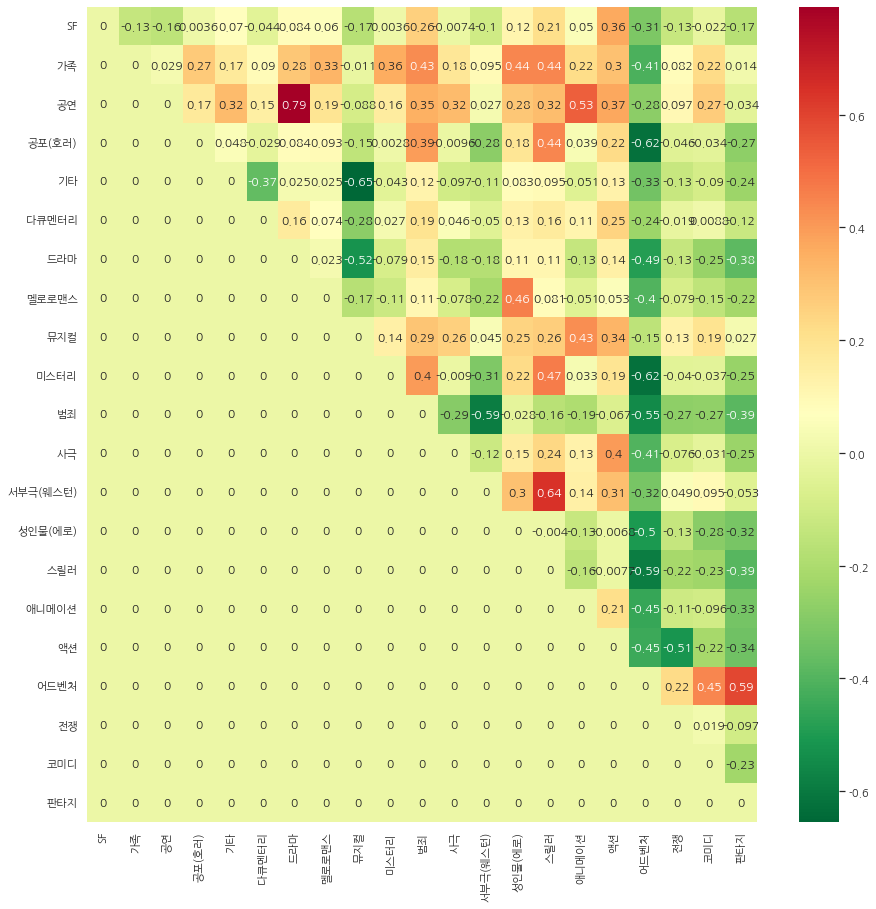

In [21]:
import numpy as np; 
import seaborn as sns; 
import matplotlib.pyplot as plt
np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15, 15))
ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax